###  Created by Luis A. Sanchez-Perez (alejand@umich.edu)

### Decisions regions for muticlass case
A glinse at decision regions and decision boundaries (in purple) for a classification problem with multiple features and mutiple classes (3) using multivariate normal distributions.

In [1]:
import numpy as np

In [2]:
points = 100
priors = [0.3,0.3,0.4]  
mu0 = [-2,-2]
sigma0 = [[1,0.5],[0.5,1]]
mu1 = [2,2];
sigma1 = [[2,0],[0,2]]
mu2 = [2.5,-2.5]
sigma2 = [[0.5,0],[0,0.5]]
limit = [-5,5]
x1 = np.linspace(limit[0],limit[1],points)
x2 = np.linspace(limit[0],limit[1],points)
[x1,x2] = np.meshgrid(x1,x2)

In [3]:
from scipy.stats import multivariate_normal

In [4]:
p0 = multivariate_normal(mean=mu0,cov=sigma0)
p1 = multivariate_normal(mean=mu1,cov=sigma1)
p2 = multivariate_normal(mean=mu2,cov=sigma2)

In [5]:
y0 = p0.pdf(np.vstack((x1.flatten(), x2.flatten())).T)
y1 = p1.pdf(np.vstack((x1.flatten(), x2.flatten())).T)
y2 = p2.pdf(np.vstack((x1.flatten(), x2.flatten())).T)

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


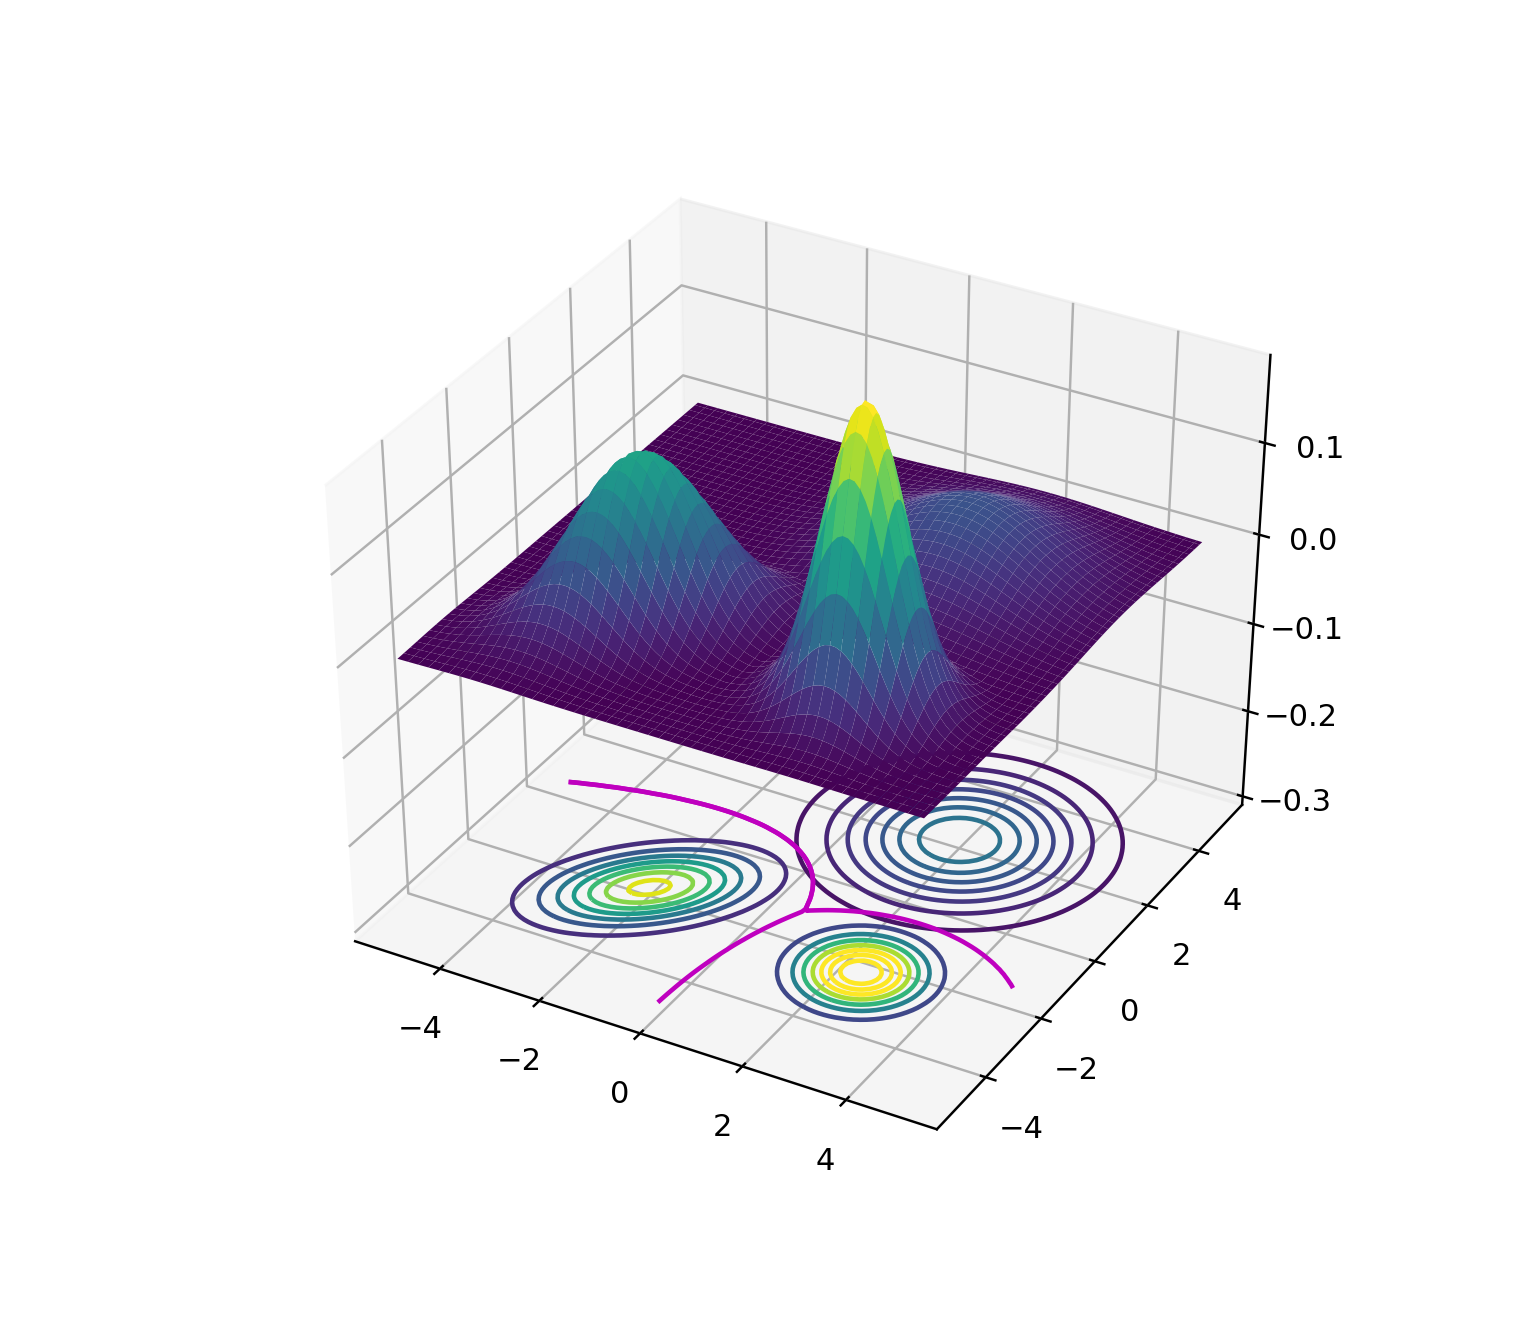

(-0.3, 0.18366382828253766)

In [7]:
%matplotlib notebook
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
y = np.vstack((y0,y1,y2)).max(axis = 0)
bottom = -0.30
top = np.vstack((y0,y1)).max()
ax.plot_surface(x1, x2, y.reshape(points,points),cmap='viridis')
ax.contour(x1,x2,y0.reshape(points,points),offset=bottom,vmin=0,vmax=top)
ax.contour(x1,x2,y1.reshape(points,points),offset=bottom,vmin=0,vmax=top)
ax.contour(x1,x2,y2.reshape(points,points),offset=bottom,vmin=0,vmax=top)
g = y0 - np.vstack((y1,y2)).max(axis = 0)
ax.contour(x1,x2,g.reshape(points,points),levels=[0],colors='m',offset= -0.30)
g = y1 - np.vstack((y0,y2)).max(axis = 0)
ax.contour(x1,x2,g.reshape(points,points),levels=[0],colors='m',offset= -0.30)
ax.set_zlim([bottom,top])